In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt



### Credits:

- https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data?select=train.csv

In [35]:
df = pd.read_csv('Dataset/train.csv')

print("The shape of the dataset is:", df.shape)
df.head()

The shape of the dataset is: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [36]:
print("Describing the train data: ")
print(df.describe().T)
print(100 * "*")

print("Info of the data: ")
print(df.info())
print(100 * "*")

print("Missing values in the data: ")
print(df.isnull().sum())


Describing the train data: 
                count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width  

- No missing values in the data set.

In [37]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

- we have 4 classes in the target variable 'price_range'.

<h2 style="color: green; text-align: center">Model Training</h2>

In [38]:
# Using train-test split

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Scale the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression(max_iter=1000)
modellr.fit(X_train, y_train)
y_pred = modellr.predict(X_test)


print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

R2 Score: 0.972
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



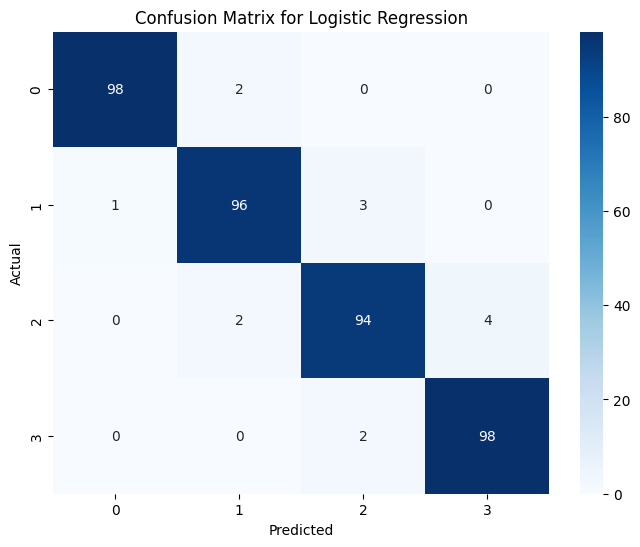

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modellr.classes_, yticklabels=modellr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [41]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10, min_samples_split=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

R2 Score: 0.88
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.80      0.82      0.81       100
           2       0.77      0.82      0.79       100
           3       0.93      0.85      0.89       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



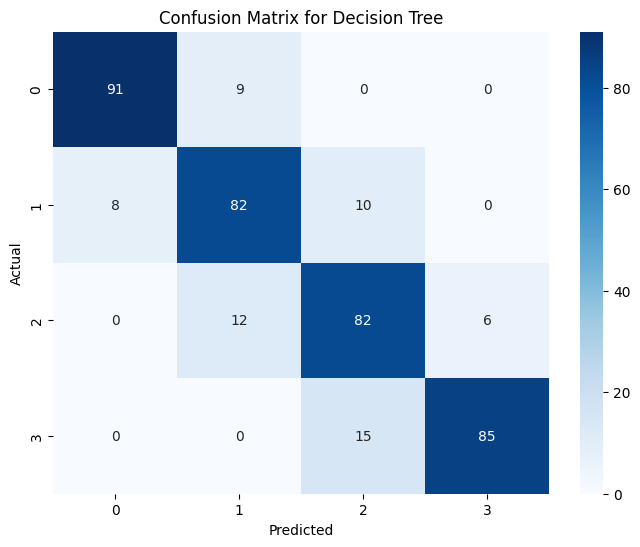

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [43]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

R2 Score: 0.904
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.82      0.84      0.83       100
           2       0.81      0.79      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



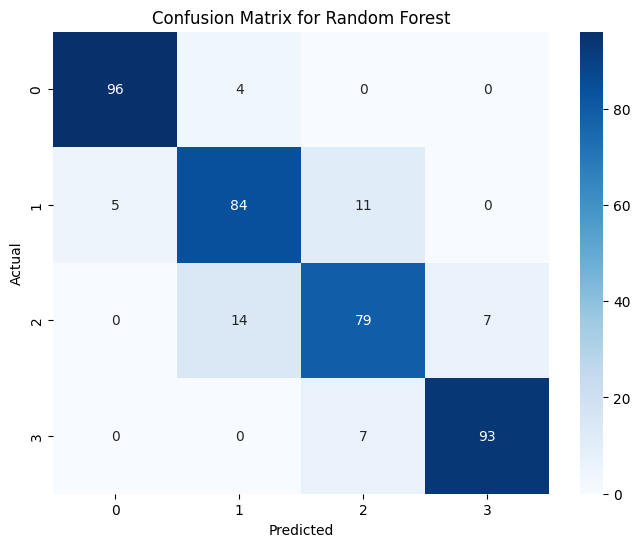

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [45]:
# Support Vector Machine
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

R2 Score: 0.916
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.87      0.87      0.87       100
           2       0.82      0.87      0.84       100
           3       0.94      0.90      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



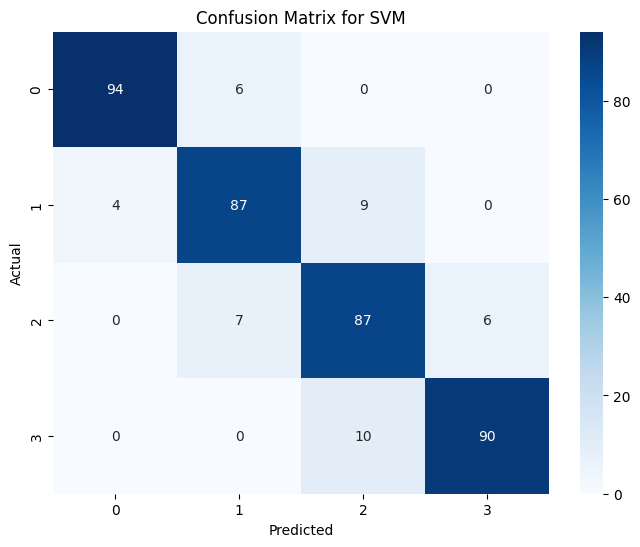

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

<h2 style="color: green; text-align: center">Model Training using My Models</h2>

R2 Score: -0.016000000000000014
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       100
           1       0.32      1.00      0.49       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100

    accuracy                           0.48       400
   macro avg       0.33      0.48      0.36       400
weighted avg       0.33      0.48      0.36       400



c:\Users\XEON\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\XEON\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\XEON\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

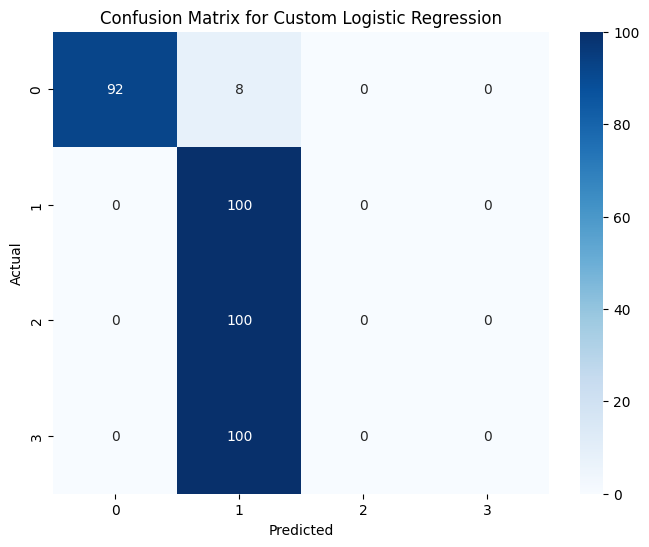

In [ ]:
from models.logistic_regression_ankit import LogisticRegressionBinary

model = LogisticRegressionBinary(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modellr.classes_, yticklabels=modellr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Custom Logistic Regression')
plt.show()

R2 Score: 0.728
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       100
           1       0.72      0.33      0.45       100
           2       0.80      0.32      0.46       100
           3       0.64      1.00      0.78       100

    accuracy                           0.66       400
   macro avg       0.70      0.66      0.61       400
weighted avg       0.70      0.66      0.61       400



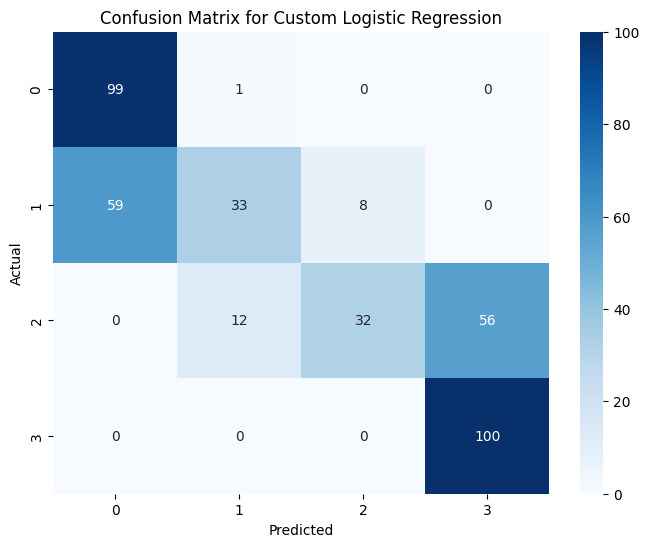

In [ ]:
from models.logistic_regression_ankit import LogisticRegressionMultiClass

model = LogisticRegressionMultiClass(learning_rate=0.01, n_iters=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modellr.classes_, yticklabels=modellr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Custom Logistic Regression')
plt.show()

R2 Score: 0.894
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       100
           1       0.84      0.80      0.82       100
           2       0.82      0.80      0.81       100
           3       0.89      0.94      0.91       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



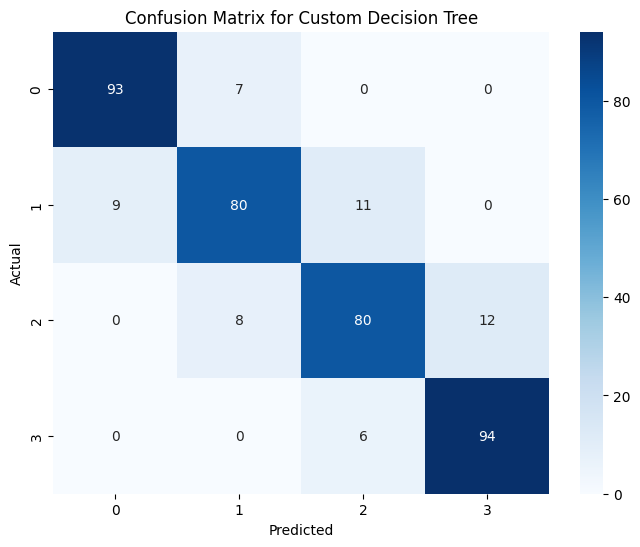

In [ ]:
from models.decision_tree_ankit import DecisionTree

model = DecisionTree(min_samples_split=2, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modellr.classes_, yticklabels=modellr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Custom Decision Tree')
plt.show()

R2 Score: 0.878
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.79      0.82      0.80       100
           2       0.80      0.75      0.77       100
           3       0.90      0.94      0.92       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



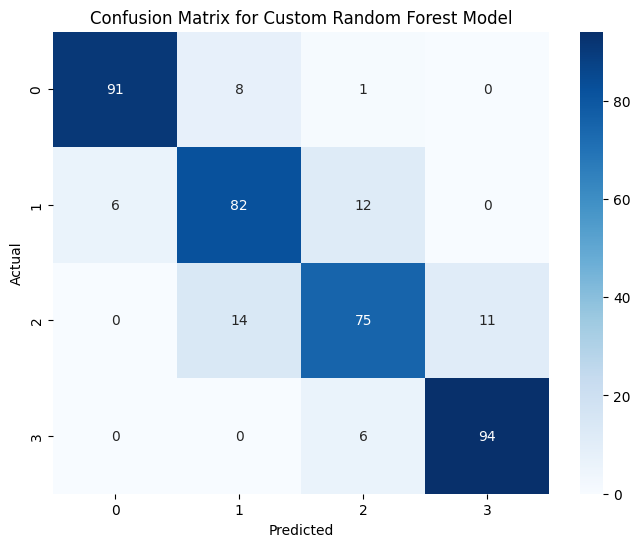

In [ ]:
from models.random_forest_ankit import RandomForest

# Train custom Random Forest model
rf_model = RandomForest(n_trees=20, max_depth=10, min_samples_split=2, n_features=5)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

cm = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=modellr.classes_, yticklabels=modellr.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Custom Random Forest Model")
plt.show()